<a href="https://colab.research.google.com/github/Arimetar/EDA-diamond-dataset/blob/main/diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [40]:
# Installation and file management
! pip install -q kaggle
from google.colab import files
import os
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
data_path = '/kaggle/input/diamonds-characteristics-and-pricing-analysis/diamonds.csv'


# Data Loading

In [42]:
# 1. อัปโหลดไฟล์ kaggle.json
print("กรุณาอัปโหลดไฟล์ kaggle.json ของคุณ:")
files.upload()

# สร้างโฟลเดอร์และตั้งค่า permission
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

กรุณาอัปโหลดไฟล์ kaggle.json ของคุณ:


Saving kaggle.json to kaggle (1).json


In [75]:
# 2. ดาวน์โหลดชุดข้อมูล
!kaggle datasets download -d zahranusrat/diamonds-characteristics-and-pricing-analysis

# 3. แตกไฟล์ .zip
with zipfile.ZipFile('diamonds-characteristics-and-pricing-analysis.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

Dataset URL: https://www.kaggle.com/datasets/zahranusrat/diamonds-characteristics-and-pricing-analysis
License(s): CC0-1.0
diamonds-characteristics-and-pricing-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [77]:
data_path = '/content/dataset/diamonds.csv'
df = pd.read_csv(data_path)


# Exploratory Data Analysis (EDA)

In [78]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [79]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


"เนื่องจากชุดข้อมูลค่อนข้างครบถ้วนถูกต้องจึงไม่มีจำเป็นต้องแก้ไขส่วนไหนมาก"

Text(0.5, 1.0, 'Boxplot of Numerical Columns')

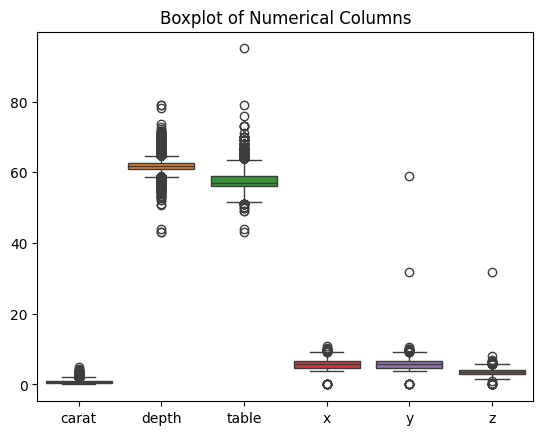

In [101]:
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
cate_cols = ['cut', 'color', 'clarity']
data = df[num_cols]
axes = sns.boxplot(data=data)
axes.set_title('Boxplot of Numerical Columns')


In [ ]:
df[num_cols].hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Pipeline for preprocessing

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [103]:
z_score = StandardScaler()
one_hot = OneHotEncoder()
# Numerical
num_prep = Pipeline(steps=[('scale', z_score)])
# Category
cate_prep = Pipeline(steps=[('onehot', one_hot)])

In [104]:
prep = ColumnTransformer(transformers=[
    ('num', num_prep, num_cols),
    ('cate', cate_prep, cate_cols)
])

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# กำหนด parameter grid สำหรับ GridSearchCV
param_grid = {
    'penalty': [None, 'l2'],
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [106]:
# สรา้ง pipeline โดยการรวมขั้นตอนทั้งหมดไว้ที่เดียว
model=Pipeline(steps=[
    ('preprocessing',prep),
    ('classification',grid_search)
])
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cate',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('classification',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'C': [0.001, 0.01, 0.1, 1],
                                          'penalty': [None, 'l2'],
                                          'solver': ['lbfgs', 'liblinear',
                                                     'newton-cg',
                                                     'newton-cholesky', 'sag',
                                                     'saga']}))])

In [113]:
X = df.drop('price', axis=1)
y = df['price'].values

In [114]:
from sklearn.model_selection import train_test_split

# แบ่งข้อมูลเป็นชุด training และ testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore

In [124]:
y_pred_logis = model.predict(X_test)

NotFittedError: Pipeline is not fitted yet.